## Learning max margins, and predicting with confidence
Code credit: purushot@cse.iitk.ac.in

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import LinearSVC as csvm


In [4]:
muPos = np.array( [-3,0] )
muNeg = np.array( [3,3] )
cov = np.array( [[16, -14] , [-14, 16]] )

d = 2 
n = 20

XPos = gsd.genEllipticalData( d, n, muPos, cov )
XNeg = gsd.genEllipticalData( d, n, muNeg, cov )

yPos = np.ones( (n,) )
yNeg = -np.ones( (n,) )
X = np.vstack( (XPos, XNeg) )
y = np.concatenate( (yPos, yNeg) )


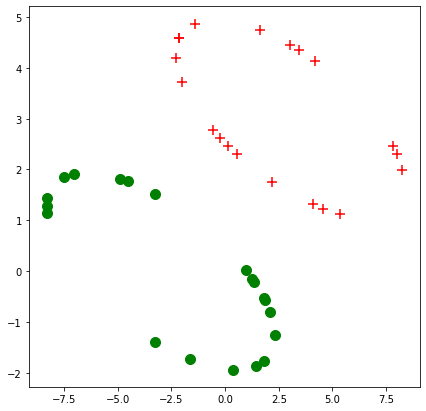

In [5]:
fig = pd.getFigure( 7, 7 )
pd.plot2D( XPos, fig, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig, color = 'r', marker = '+' )


In [8]:
clf = lr( penalty= "l2", C = 1.0, fit_intercept = True, solver = "liblinear" )
clf.fit( X, y )

def logRegBatch( X ):
    return clf.predict_proba( X )[:,1]


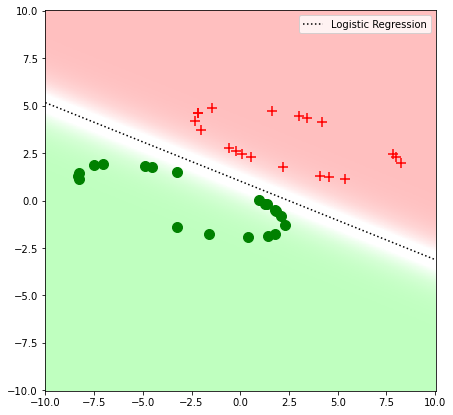

In [11]:
fig = pd.getFigure( 7, 7 )
pd.shade2DProb( logRegBatch, fig, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig, color = 'r', marker = '+' )
pd.plotLine( clf.coef_.T, clf.intercept_, fig, linestyle = ':', label = "Logistic Regression" )

Note that logistic regression need not necessarily maximize the margin.

Also note that close to the decision boundary, logistic regression gives confused PMFs (color almost white)

Far away from the decision boundary, logistic regression gives confident answers (color either dark red or dark green)


In [12]:

clf2 = csvm( penalty= "l2", loss = "hinge", C = 1.0, fit_intercept = True )
clf2.fit( X, y )

def CSVM( X ):
    return np.sign(X.dot(clf2.coef_.T) + clf2.intercept_)


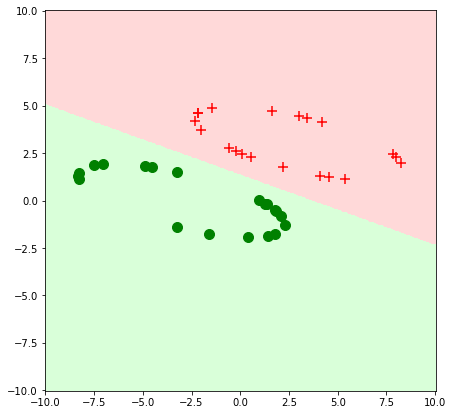

In [13]:
fig2 = pd.getFigure( 7, 7 )
pd.shade2D( CSVM, fig2, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig2, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig2, color = 'r', marker = '+' )



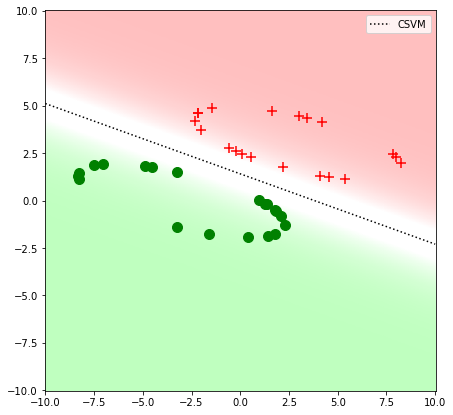

In [14]:
# CSVM does not itself offer probabilistic predictions - however, we can use the sigmoidal map on CSVM scores too
def CSVMProb( X ):
    w = clf2.coef_.T
    b = clf2.intercept_
    score = X.dot(w) + b
    return 1/(1 + np.exp(-score))

fig3 = pd.getFigure( 7, 7 )
pd.shade2DProb( CSVMProb, fig3, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig3, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig3, color = 'r', marker = '+' )
pd.plotLine( clf2.coef_.T, clf2.intercept_, fig3, linestyle = ':', label = "CSVM" )

Note that SVM maximizes the marging

Note also, that SVM shows a similar trend in confidence as LR

What happens when the data are not linearly separable? 

In [15]:
muPos = np.array( [-0.5,0] )
muNeg = np.array( [0.5,0.5] )
cov = np.array( [[16, -14] , [-14, 16]] )

XPos = gsd.genEllipticalData( d, n, muPos, cov )
XNeg = gsd.genEllipticalData( d, n, muNeg, cov )

yPos = np.ones( (n,) )
yNeg = -np.ones( (n,) )
X = np.vstack( (XPos, XNeg) )
y = np.concatenate( (yPos, yNeg) )

clf.fit( X, y )
clf2.fit( X, y )

# If data is badly mixed up or not linearly separable, then probabilistic methods become very useful

# Logistic regression on the other hand, gives us a PMF which we can use to gauge confidence of the model on a data point
# If confidene of a model is low on a data point, we may ask some other model/even a human to classify that data point
# Note: here, even several training points are lying in low-confidence regions where the color is almost white


LinearSVC(loss='hinge')

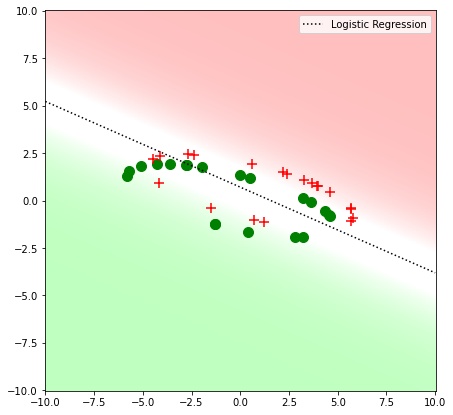

In [16]:
fig4 = pd.getFigure( 7, 7 )
pd.shade2DProb( logRegBatch, fig4, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig4, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig4, color = 'r', marker = '+' )
pd.plotLine( clf.coef_.T, clf.intercept_, fig4, linestyle = ':', label = "Logistic Regression" )



LR does what it can, given the poorly separated data. It basically says that it cannot confidently predict very many labels. 

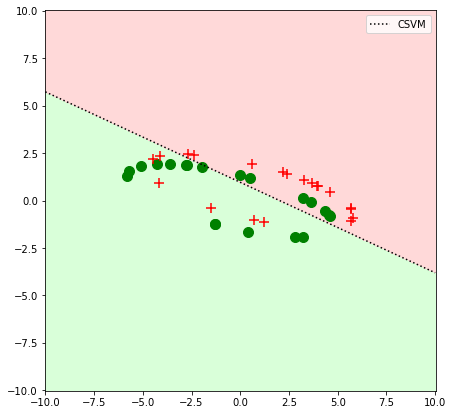

In [19]:

fig5 = pd.getFigure( 7, 7 )
pd.shade2D( CSVM, fig5, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig5, color = 'g', marker = 'o' )
pd.plot2D( XNeg, fig5, color = 'r', marker = '+' )
pd.plotLine( clf2.coef_.T, clf2.intercept_, fig5, linestyle = ':', label = "CSVM" )

Now SVM doesn't look all that attractive any more. Margins don't make much sense when the data are not separable, and we don't have any reasonable confidence judgments also.

Take home exercise:

(i) Use logistic regression to classify this [dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

(ii) Use SVM to do the same thing

(iii) Which is better? Why?